Ch3 p72

The following data seem to fit a cubic equation but determine by least squares the optimum degree. 

In [33]:
import numpy as np
from tabulate import tabulate
from naf.incf import least_squares_polynomial, eval_poly
import matplotlib.pyplot as plt

In [44]:
x = np.array([0.1,1.1,1.6,2.4,2.5,4.1,5.2,6.1,6.6,7.1,8.2,9.1,9.4,
              11.1,11.4,12.2,13.2,14.1,15.6,16.1,17.6,17.9,19.1,20.0])
y = np.array([1.9,7.9,24.9,24.9,34.9,42.7,29.7,49.8,36.1,23.7,13.0,20.5,
              -3.1,-13.0,-28.7,-39.5,-48.6,-40.2,-51.6,-30.5,-34.6,-16.4,-13.4,-1.1])
pts = np.column_stack((x,y))

In [45]:
print(tabulate(pts))

----  -----
 0.1    1.9
 1.1    7.9
 1.6   24.9
 2.4   24.9
 2.5   34.9
 4.1   42.7
 5.2   29.7
 6.1   49.8
 6.6   36.1
 7.1   23.7
 8.2   13
 9.1   20.5
 9.4   -3.1
11.1  -13
11.4  -28.7
12.2  -39.5
13.2  -48.6
14.1  -40.2
15.6  -51.6
16.1  -30.5
17.6  -34.6
17.9  -16.4
19.1  -13.4
20     -1.1
----  -----


In [46]:
N = x.shape[0]

for i in range(1,N-1):
    a = least_squares_polynomial(pts, i)
    yintp = eval_poly(a, x)
    esqd = sum((yintp-y)**2)
    ssqd = esqd/(N-i-1)
    print(i, ssqd)

1 512.0031633764644
2 533.3506346835823
3 85.4716164784586
4 86.73162533093881
5 64.8176943342191
6 68.48593871510593
7 72.01629685762273
8 73.6680075907816
9 78.46909071589629
10 84.49953648947803
11 90.84813871192296
12 102.36369538451386
13 108.83024643960826
14 112.09922997158371
15 125.54486932376525
16 187.86934349507357
17 170.87569767531588
18 200.8465096313011
19 3133.596024815316
20 336.92229527769007
21 523.0590429816671
22 1884.146480865656


In [47]:
a3 = least_squares_polynomial(pts, 3)
y3 = eval_poly(a3, x)

a5 = least_squares_polynomial(pts, 5)
y5 = eval_poly(a5, x)

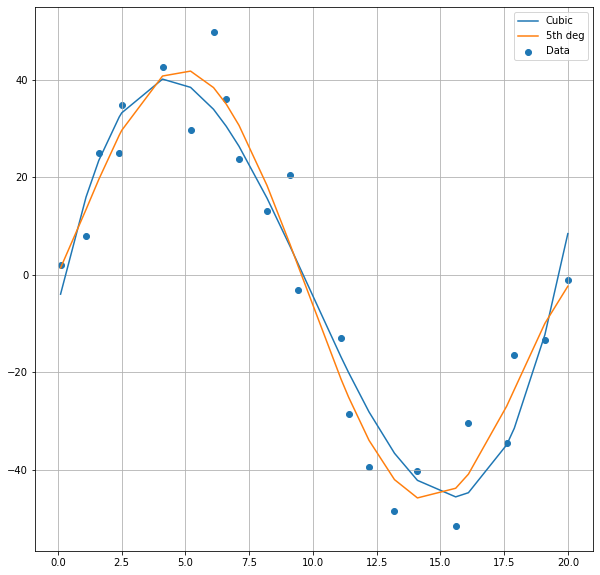

In [53]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x,y, label='Data')
ax.plot(x, y3, label='Cubic')
ax.plot(x, y5, label='5th deg')

ax.grid()
ax.legend()
plt.show()

For this problem the optimum polynomial is 5th degree as seen by the decrease in the variance followed by an increase for the 6th degree polynomial. This is different from the problem statement which assumed the data to be well represented by a 3rd degree polynomial.

A note:
1. A better algorightm could be written to find the optimum polynomial degree by simply comparing each successive variance and then stopping the search when the subsequent variance increased compared to the previous iteration.